# Part 1 - Analyze and Explore the Climate Data 

In [1]:
# Import dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import pprint

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a  base
Base = automap_base()

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
conn=engine.connect()
session = Session(engine)

# Exploratory Precitpation Analysis

In [8]:
engine.execute('select max(date) from Measurement').fetchall()


[('2017-08-23',)]

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
perciptitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
perciptitation_df = pd.DataFrame(perciptitation_data).set_index('date')

perciptitation_df = perciptitation_df.rename(columns={"prcp" : "precipitation"})

# Sort the dataframe by date
perciptitation_df= perciptitation_df.sort_values(by='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
perciptitation_df

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
perciptitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


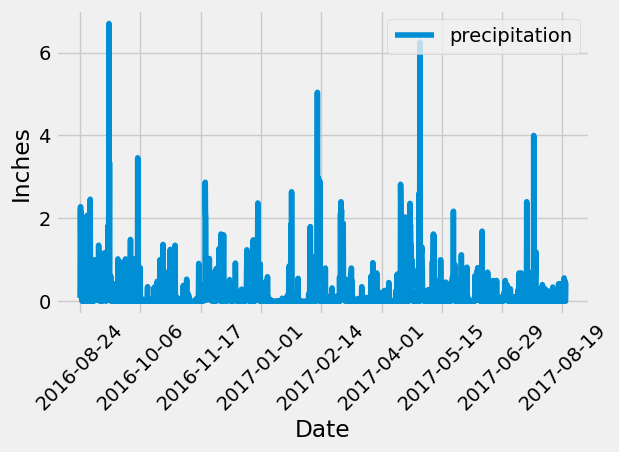

In [11]:
# plot the data
perciptitation_df.plot(rot=45, xlabel = "Date", ylabel = "Inches")
plt.legend(loc="upper right")
plt.savefig("Annual_Percipitaion_in_Hawaii")
plt.tight_layout()
plt.show()

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_num = session.query(Station.id).count()
print(station_num)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs).filter(Measurement.station == "USC00519281")).all()

[(53.0, 87.0, 71.66378066378067)]

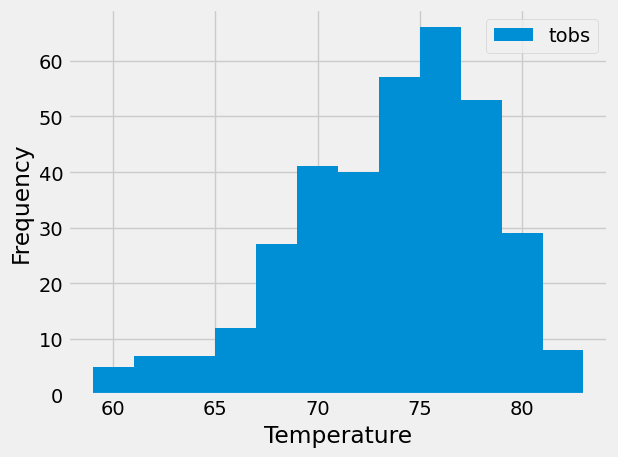

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous = dt.date(2017,8,23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281").filter(Measurement.date >= previous).all()

df= pd.DataFrame(results, columns=["tobs"])
df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.savefig("Most_Active_Station_Annual_Percipitation")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()